In [3]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#from sklearn.datasets import load_boston

In [4]:
# 住宅価格データセットのダウンロード
#boston = load_boston()
# 特徴量に低所得者の割合(LSTAT)を選択し100行に絞り込み
#X = boston.data[:100,[12]]
# 正解に住宅価格(MDEV)を設定し100行に絞り込み
#y = boston.target[:100]
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = np.ravel(raw_df.values[1::2, 2])
X = X[:100,[12]]
y = y[:100]

# 決定木回帰のモデルを作成
# The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'poisson', 'friedman_mse', 'absolute_error'}. Got 'mse' instead.
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)

# モデルの訓練
model.fit(X, y)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\treme\AppData\Local\Temp\ipykernel_17532\1749012455.py:9: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


DecisionTreeRegressor(max_depth=3, random_state=0)

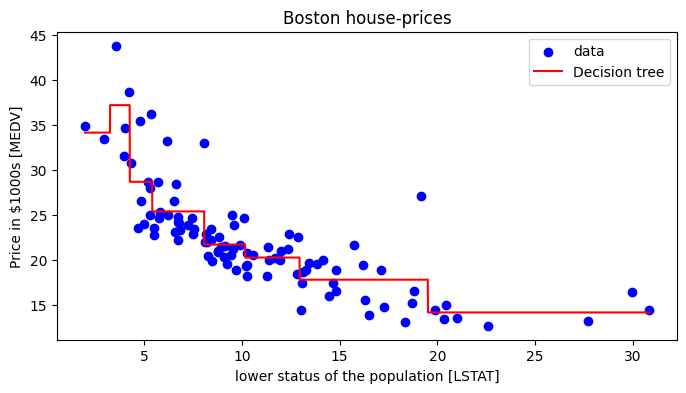

In [5]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 訓練データの最小値から最大値まで0.01刻みのX_pltを作成し、住宅価格を予測
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt)

# 訓練データ(低所得者の割合と住宅価格)の散布図と決定木回帰のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red',label='Decision tree')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('lower status of the population [LSTAT]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')

plt.show()